## UAP 1 (SOM)

Nama : Salma Adzra Fathina

NIM : 225150207111042

### Penentuan jumlah klaster dengan Elbow Method pada SOM

Perusahaan tempat anda bekerja meminta anda untuk membuat segmentasi pelanggan. Untuk menyelesaikan tugas tersebut, anda menggunakan SOM untuk melakukan clustering. Namun, karena anda tidak tahu jumlah klaster optimal maka anda menggunakan Elbow Method untuk menentukan jumlah klaster

Catatan :
- Template kode yang diberikan dapat diubah sesuai dengan kebutuhan
- Elbow Method memanfaatkan metode plotting dengan lineplot untuk membantu menentukan jumlah klaster
- Elbow Point ditandai dengan nilai distortion yang turun drastis dan melandai pada nilai k selanjutnya

Peraturan :
- Open Modul
- Dilarang menggunakan AI (Chatbot, Code Generator, dll) untuk membantu pengerjaan
- Dilarang menggunakan library yang mengimplementasikan SOM siap pakai
- Terindikasi menggunakan AI ataupun library akan terkena penalti nilai

## Data Loading and Preprocessing

In [ ]:
from google.colab import files

files.upload()

Saving Data SOM.csv to Data SOM.csv


{'Data SOM.csv': b'CustomerID,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,Class\r\n15776156,1,22.08,11.46,2,4,4,1.585,0,0,0,1,2,100,1213,0\r\n15739548,0,22.67,7,2,8,4,0.165,0,0,0,0,2,160,1,0\r\n15662854,0,29.58,1.75,1,4,4,1.25,0,0,0,1,2,280,1,0\r\n15687688,0,21.67,11.5,1,5,3,0,1,1,11,1,2,0,1,1\r\n15715750,1,20.17,8.17,2,6,4,1.96,1,1,14,0,2,60,159,1\r\n15571121,0,15.83,0.585,2,8,8,1.5,1,1,2,0,2,100,1,1\r\n15726466,1,17.42,6.5,2,3,4,0.125,0,0,0,0,2,60,101,0\r\n15660390,0,58.67,4.46,2,11,8,3.04,1,1,6,0,2,43,561,1\r\n15663942,1,27.83,1,1,2,8,3,0,0,0,0,2,176,538,0\r\n15638610,0,55.75,7.08,2,4,8,6.75,1,1,3,1,2,100,51,0\r\n15644446,1,33.5,1.75,2,14,8,4.5,1,1,4,1,2,253,858,1\r\n15585892,1,41.42,5,2,11,8,5,1,1,6,1,2,470,1,1\r\n15609356,1,20.67,1.25,1,8,8,1.375,1,1,3,1,2,140,211,0\r\n15803378,1,34.92,5,2,14,8,7.5,1,1,6,1,2,0,1001,1\r\n15599440,1,58.58,2.71,2,8,4,2.415,0,0,0,1,2,320,1,0\r\n15692408,1,48.08,6.04,2,4,4,0.04,0,0,0,0,2,0,2691,1\r\n15683168,1,29.58,4.5,2,9,4,7.5,1,1,2,1,2,330,1,1\r

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv('Data SOM.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   CustomerID  690 non-null    int64  
 1   A1          690 non-null    int64  
 2   A2          690 non-null    float64
 3   A3          690 non-null    float64
 4   A4          690 non-null    int64  
 5   A5          690 non-null    int64  
 6   A6          690 non-null    int64  
 7   A7          690 non-null    float64
 8   A8          690 non-null    int64  
 9   A9          690 non-null    int64  
 10  A10         690 non-null    int64  
 11  A11         690 non-null    int64  
 12  A12         690 non-null    int64  
 13  A13         690 non-null    int64  
 14  A14         690 non-null    int64  
 15  Class       690 non-null    int64  
dtypes: float64(3), int64(13)
memory usage: 86.4 KB


In [ ]:
df.describe()

,CustomerID,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,Class
count,6.900000e+02,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.00000,690.000000,690.000000,690.000000,690.000000,690.000000
mean,1.569047e+07,0.678261,31.568203,4.758725,1.766667,7.372464,4.692754,2.223406,0.523188,0.427536,2.40000,0.457971,1.928986,184.014493,1018.385507,0.444928
std,7.150647e+04,0.467482,11.853273,4.978163,0.430063,3.683265,1.992316,3.346513,0.499824,0.495080,4.86294,0.498592,0.298813,172.159274,5210.102598,0.497318
min,1.556571e+07,0.000000,13.750000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,1.000000,0.000000,1.000000,0.000000
25%,1.563169e+07,0.000000,22.670000,1.000000,2.000000,4.000000,4.000000,0.165000,0.000000,0.000000,0.00000,0.000000,2.000000,80.000000,1.000000,0.000000
50%,1.569016e+07,1.000000,28.625000,2.750000,2.000000,8.000000,4.000000,1.000000,1.000000,0.000000,0.00000,0.000000,2.000000,160.000000,6.000000,0.000000
75%,1.575190e+07,1.000000,37.707500,7.207500,2.000000,10.000000,5.000000,2.625000,1.000000,1.000000,3.00000,1.000000,2.000000,272.000000,396.500000,1.000000
max,1.581544e+07,1.000000,80.250000,28.000000,3.000000,14.000000,9.000000,28.500000,1.000000,1.000000,67.00000,1.000000,3.000000,2000.000000,100001.000000,1.000000


In [ ]:
#Preprocessing

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

## Implementasi SOM

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

def som(X, lrate, b, max_epoch, n_cluster):
    centroids = np.random.uniform(size=(n_cluster, len(X[0])))
    epoch = 0
    labels = []

    while epoch < max_epoch:
      for x in X:
        d = [sum((w - x) ** 2) for w in centroids]
        min = np.argmin(d)
        centroids[min] += lrate * (x - centroids[min])

      lrate *= b
      epoch += 1

    for x in X:
      d = [sum((w - x) ** 2) for w in centroids]
      min = np.argmin(d)

      labels.append(min)

    return centroids, labels

def elbow_method(X, max_cluster):
  distortions = []
  for num_cluster in range(1, max_cluster + 1):
      centroids, labels = som(X, lrate=0.1, b=0.5, max_epoch=100, n_cluster=num_cluster)
      distortions.append(sum([np.linalg.norm(x - centroids[labels[i]]) ** 2 for i, x in enumerate(X)]))
  return distortions


def plot_elbow(distortions, max_cluster):
    k_values = range(1, max_cluster + 1)
    plt.figure(figsize=(8, 5))
    plt.plot(k_values, distortions, marker='o', color='b')
    plt.title('Elbow Method for SOM')
    plt.xlabel('Number of Clusters (k)')
    plt.ylabel('Distortion')
    plt.grid(True)
    plt.show()


[2, 1, 1, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 2, 2, 0, 0, 2, 0, 1, 1, 2, 2, 2, 0, 2, 0, 0, 0, 0, 1, 2, 0, 2, 2, 2, 0, 0, 0, 2, 2, 2, 0, 2, 0, 1, 2, 1, 0, 2, 2, 2, 2, 2, 0, 0, 1, 2, 0, 2, 1, 0, 1, 1, 0, 1, 2, 2, 0, 2, 1, 2, 0, 0, 2, 2, 2, 2, 0, 0, 1, 1, 2, 2, 2, 1, 0, 2, 2, 2, 2, 2, 0, 1, 2, 1, 2, 1, 0, 1, 2, 2, 0, 2, 1, 0, 2, 1, 2, 2, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 1, 0, 0, 2, 0, 2, 1, 0, 0, 1, 2, 1, 2, 1, 2, 0, 0, 0, 2, 1, 2, 0, 1, 0, 0, 1, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 1, 0, 0, 2, 2, 2, 1, 2, 2, 1, 0, 2, 2, 0, 2, 1, 1, 0, 2, 2, 0, 0, 2, 2, 2, 2, 2, 1, 1, 2, 0, 1, 2, 2, 0, 0, 2, 1, 2, 0, 1, 2, 1, 0, 0, 2, 1, 2, 2, 0, 2, 2, 0, 1, 0, 2, 2, 2, 0, 0, 2, 0, 2, 2, 2, 2, 2, 0, 0, 0, 2, 2, 0, 0, 0, 1, 1, 2, 2, 1, 0, 0, 2, 2, 1, 1, 0, 0, 2, 2, 2, 0, 2, 1, 0, 2, 2, 2, 2, 2, 2, 1, 1, 0, 1, 2, 0, 2, 2, 1, 2, 2, 1, 0, 2, 1, 2, 0, 0, 2, 2, 2, 2, 2, 0, 0, 2, 2, 1, 2, 1, 0, 0, 2, 2, 1, 2, 0, 2, 0, 2, 2, 2, 1, 0, 1, 2, 1, 2, 2, 1, 0, 0, 2, 2, 1, 0, 1, 0, 0, 2, 0, 2, 0, 0, 2, 1, 2, 2, 0, 2, 2, 

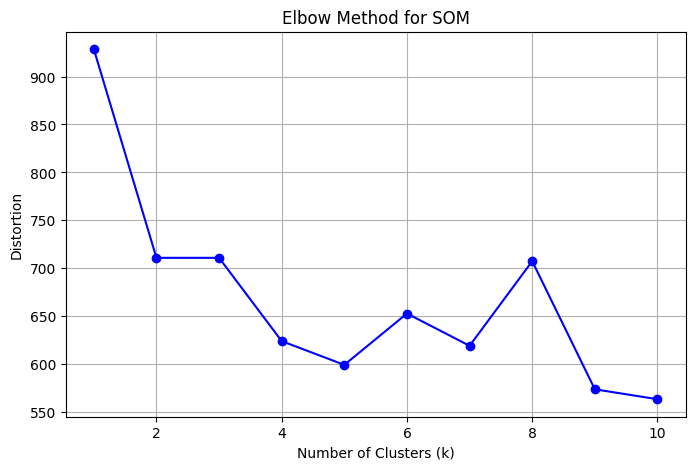

In [ ]:
# Gunakan data yang telah dipersiapkan sebelumnya untuk melatih model SOM dan lakukan pengujian nilai k menggunakan Elbow Method
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

X = df.drop('Class', axis=1).to_numpy()
centroids, labels = som(X, lrate = 0.5, b = 0.5, max_epoch = 100, n_cluster = 3)
print(labels)
plot_elbow(elbow_method(X, 10), 10)


## Analisis


1. Jelaskan konsep Elbow Method!
2. Berapa jumlah cluster paling optimal yang dihasilkan melalui Elbow Method?
3. Jelaskan pengaruh lrate, b, max_epoch, dan n_cluster pada tuning parameter yang anda lakukan!

## Jawaban

1. Elbow method merupakan metode untuk mencari jumlah cluster terbaik. Jadi pada saat jumlah cluster melewati jumlah yang optimal maka distortion akan menurun dengan kecil sehingga hasil dari grafik akan membentuk siku.

2. Dilihat pada grafik diatas, penurunan yang signifikan terjadi pada cluster ke 2, namun setelah clusster ke 4, penurunan distortion mulai melambat sehingga cluster yang optimal adalah 4

3. setelah tuning terlihat jumlah cluster ada 4 dengan label 0,1,2 dan 3, sehingga dengan bertambahnya jumlah cluster meningkatkan granularitas pada pengelompokan data

In [ ]:
#untuk no 3
centroids1, labels1 = som(X, lrate = 0.5, b = 0.5, max_epoch = 100, n_cluster = 4)
print(labels1)

[0, 3, 3, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 0, 0, 2, 2, 0, 2, 3, 3, 0, 0, 0, 2, 0, 2, 2, 2, 2, 3, 0, 2, 0, 0, 0, 2, 2, 2, 0, 0, 0, 2, 0, 2, 3, 0, 3, 2, 0, 0, 0, 0, 0, 2, 2, 3, 0, 2, 0, 3, 2, 3, 3, 2, 3, 0, 0, 2, 0, 3, 0, 2, 2, 0, 0, 0, 0, 2, 2, 3, 3, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0, 2, 3, 0, 3, 0, 3, 2, 3, 0, 0, 2, 0, 3, 2, 0, 3, 0, 0, 0, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 3, 2, 2, 0, 2, 0, 3, 2, 2, 3, 0, 3, 0, 3, 0, 2, 2, 2, 0, 3, 0, 2, 3, 2, 2, 3, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 3, 2, 2, 0, 0, 0, 3, 0, 0, 3, 2, 0, 0, 2, 0, 3, 3, 2, 0, 0, 2, 2, 0, 0, 0, 0, 0, 3, 3, 0, 2, 3, 0, 0, 2, 2, 0, 3, 0, 2, 3, 0, 3, 2, 2, 0, 3, 0, 0, 2, 0, 0, 2, 3, 2, 0, 0, 0, 2, 2, 0, 2, 0, 0, 0, 0, 0, 2, 2, 2, 0, 0, 2, 2, 2, 3, 3, 0, 0, 3, 2, 2, 0, 0, 3, 3, 2, 2, 0, 0, 0, 2, 0, 3, 2, 0, 0, 0, 0, 0, 0, 3, 3, 2, 3, 0, 2, 0, 0, 3, 0, 0, 3, 2, 0, 3, 0, 2, 2, 0, 0, 0, 0, 0, 2, 2, 0, 0, 3, 0, 3, 2, 2, 0, 0, 3, 0, 2, 0, 2, 0, 0, 0, 3, 2, 3, 0, 3, 0, 0, 3, 2, 2, 0, 0, 3, 2, 3, 2, 2, 0, 2, 0, 2, 2, 0, 3, 0, 0, 2, 0, 0, 